In [94]:
import wget

In [95]:
wget --user=zaniar.ardalan@gmail.com --password="Z@niar90367" https://drive.google.com/drive/u/0/my-drive/10052017_Wu.pdf

SyntaxError: invalid syntax (<ipython-input-95-033bd8c5a30c>, line 1)

In [1]:
import os
from sklearn.model_selection import train_test_split
import pydicom
import matplotlib.pyplot as plt
import tensorflow as tf
from cnn_2layer import cnn_2layer

height=128
width=128
channel=1
n_inputs = channel*height*width
n_fc1 = 64
n_outputs = 3
# sess2=tf.Session()
path="C:/Users/Xaniar/Anaconda3/Scripts/MyProjects/ImageProc/fMRI/images/"
images=[]
classes=[]
for k in range (0,546):
    files_names=os.listdir(path)
#     print(k)
    ds = pydicom.dcmread("images/"+files_names[k])
    data = ds.pixel_array
#     d=data[700:730,700:730]
#     plt.imshow(d, cmap=plt.cm.bone)
#     plt.show()
    for i in range (0, 8):
        for j in range (0,8):
            image=data[(i*128):(i*128)+128,(j*128):(j*128)+128]
            images.append(image)
            classname=files_names[k].split(".")[0]
            if classname=="MCI1":
                lbl=1
            elif classname=="HY01":
                lbl=2
            else:
                lbl=3
            classes.append(lbl)
train_images, test_images, train_labels, test_labels = train_test_split(images, classes, test_size=0.30)
tf.reset_default_graph()
logits, Y_proba, X=cnn_2layer (n_inputs, n_outputs, height, width, channel)

KeyboardInterrupt: 

In [21]:
with tf.name_scope("train"):
    y = tf.placeholder(tf.int32, shape = [None], name = "y")
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

n_epochs = 5
batch_size = 32
train_mode = tf.placeholder(tf.bool)
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        print (epoch)
        for iteration in range(batch_size):
            idx = np.random.choice(np.where(train_images)[0], size= batch_size )
            X_batch = train_images[idx,:]
            y_batch = [[train_labels[x] for x in idx]]
            y_batch = np.reshape(y_batch,batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch,train_mode: 1})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch,train_mode: 0})
        acc_test = accuracy.eval(feed_dict={X: test_images, y: test_labels,train_mode: 0})
        print("Epoch:",epoch+1, "Train accuracy:", acc_train, "Validation accuracy:", acc_test)
        


0


NameError: name 'np' is not defined

In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
from sklearn.model_selection import train_test_split
from test_train_split import test_train_split
from cnn_2layer import cnn_2layer

height=128
width=128
channel=1
n_inputs = channel*height*width
n_fc1 = 64
n_outputs = 3

dir="C:/Users/Xaniar/Anaconda3/Scripts/MyProjects/ImageProc/Multi-Pie/data/"
[train_images, test_images, train_labels, test_labels]= test_train_split (dir, height, width,channel)
# print (test_images[0])

tf.reset_default_graph()
logits, Y_proba, X=cnn_2layer (n_inputs, n_outputs, height, width, channel)

with tf.name_scope("train"):
    y = tf.placeholder(tf.int32, shape = [None], name = "y")
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

n_epochs = 5
batch_size = 32
train_mode = tf.placeholder(tf.bool)
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        print (epoch)
        for iteration in range(batch_size):
            idx = np.random.choice(np.where(train_images)[0], size= batch_size )
            X_batch = train_images[idx,:]
            y_batch = [[train_labels[x] for x in idx]]
            y_batch = np.reshape(y_batch,batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch,train_mode: 1})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch,train_mode: 0})
        acc_test = accuracy.eval(feed_dict={X: test_images, y: test_labels,train_mode: 0})
        print("Epoch:",epoch+1, "Train accuracy:", acc_train, "Validation accuracy:", acc_test)
        


In [11]:
images[0]
# classes[0]

array([[ 0,  1,  1, ...,  1,  1,  1],
       [ 0,  1,  1, ...,  1,  2,  1],
       [ 0,  1,  2, ...,  2,  1,  1],
       ...,
       [ 0,  1,  1, ..., 14, 15, 17],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint16)

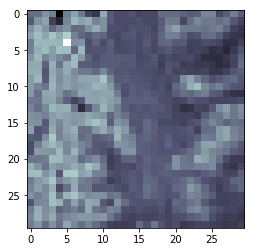

In [70]:
import pydicom
import matplotlib.pyplot as plt
ds = pydicom.dcmread("images/HY01.MR.CHEN_FMRI.0018.0002.2017.09.15.16.28.51.577908.352782443.IMA")
data = ds.pixel_array
d=data[700:730,700:730]
plt.imshow(d, cmap=plt.cm.bone)
plt.show()
images=[]
for i in range (0, 8):
    for j in range (0,8):
        image=data[(i*128):(i*128)+128,(j*128):(j*128)+128]
        images.append(image)
# get the pixel information into a numpy array
# data = ds.pixel_array
# print('The image has {} x {} voxels'.format(data.shape[0],
#                                             data.shape[1]))
# data_downsampling = data[::8, ::8]
# print('The downsampled image has {} x {} voxels'.format(
#     data_downsampling.shape[0], data_downsampling.shape[1]))


In [59]:
images=[]
for i in range (0, 8):
    for j in range (0,8):
        image=data[(i*128):(i*128)+128,(j*128):(j*128)+128]
        images.append(image)

value of i: 0
value of i: 1
value of i: 2
value of i: 3
value of i: 4
value of i: 5
value of i: 6
value of i: 7


64

In [65]:
len(images)

64

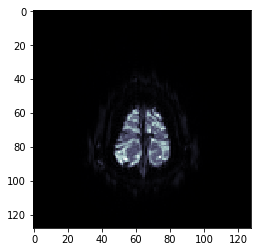

In [74]:
d=images[62]
plt.imshow(d, cmap=plt.cm.bone)
plt.show()


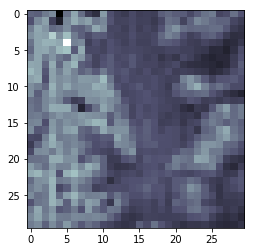

In [10]:
d=data[700:730,700:730]
d
plt.imshow(d, cmap=plt.cm.bone)
plt.show()

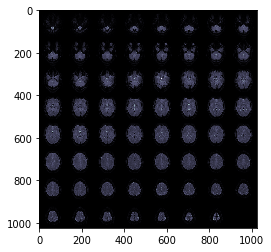

In [4]:
ds = pydicom.dcmread("images/HY01.MR.CHEN_FMRI.0018.0001.2017.09.15.16.28.51.577908.352782362.IMA")
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()

